#  CatBoostClassifier with MinMaxScaler

This Code template is for the Classification task using CatBoostClassifier with MinMaxScaler Rescaling Technique without a pipeline. In this demostration CatBoostClassifier from CatBoost library is utilized

## Required Packages

In [ ]:
!pip install imblearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as se
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

## Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are required for model training 

In [3]:
#x_values
features=[]

Target feature for prediction

In [4]:
#y_value
target=''

## Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [6]:
X=df[features]
Y=df[target]

## Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes

In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Encoded Target: ['setosa' 'versicolor' 'virginica'] to [0, 1, 2]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

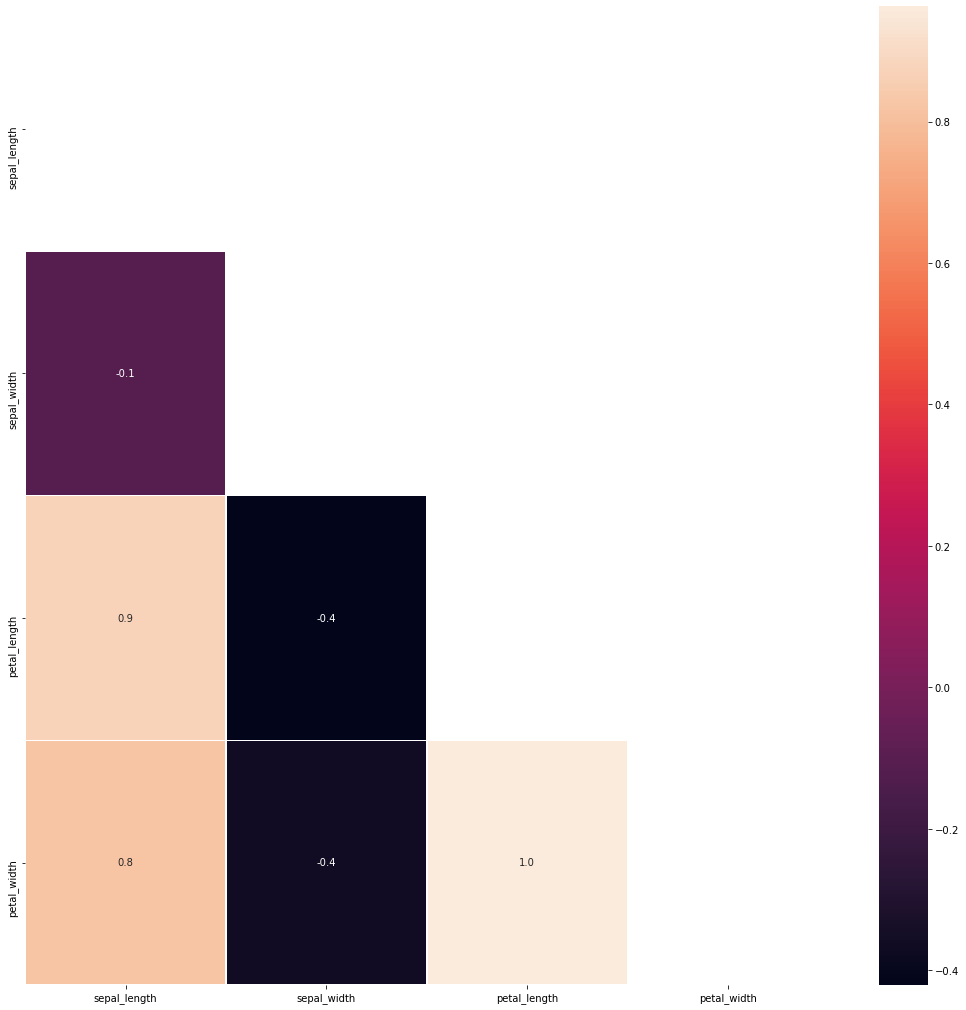

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

## Distribution Of Target Variable

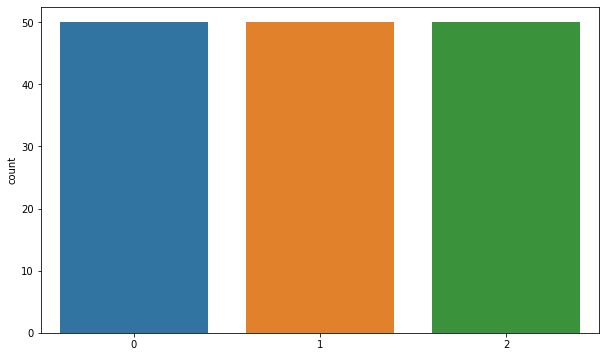

In [10]:
plt.figure(figsize = (10,6))
se.countplot(Y)

## Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

## Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [12]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

## Data Rescaling

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">More about MinMaxScaler</a>

In [13]:
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

## Model

CatBoost is an algorithm for gradient boosting on decision trees. Developed by Yandex researchers and engineers, it is the successor of the MatrixNet algorithm that is widely used within the company for ranking tasks, forecasting and making recommendations.

Model Tuning Parameters
> **learning_rate  ->** it is defined automatically for Logloss, MultiClass & RMSE loss functions depending on the number of iterations if none of these parameters is set.The learning rate is used for reducing the gradient step.

> **l2_leaf_reg  ->**  Coefficient at the L2 regularization term of the cost function. Any positive value is allowed.

> **bootstrap_type  ->** Defines the method for sampling the weights of objects.

> **subsample  ->** Sample rate for bagging. This parameter can be used if one of the following bootstrap types is selected:

 > * Poisson
 > * Bernoulli
 > * MVS

For more info: [API](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)

In [14]:
model=CatBoostClassifier()
model.fit(x_train,y_train)

Learning rate set to 0.071363
0:	learn: 1.0079393	total: 156ms	remaining: 2m 36s
1:	learn: 0.9371898	total: 158ms	remaining: 1m 18s
2:	learn: 0.8813027	total: 160ms	remaining: 53.1s
3:	learn: 0.8209497	total: 161ms	remaining: 40.1s
4:	learn: 0.7706817	total: 163ms	remaining: 32.3s
5:	learn: 0.7165978	total: 164ms	remaining: 27.1s
6:	learn: 0.6807379	total: 164ms	remaining: 23.3s
7:	learn: 0.6455353	total: 165ms	remaining: 20.5s
8:	learn: 0.6061729	total: 167ms	remaining: 18.3s
9:	learn: 0.5775489	total: 168ms	remaining: 16.6s
10:	learn: 0.5445784	total: 169ms	remaining: 15.2s
11:	learn: 0.5206296	total: 170ms	remaining: 14s
12:	learn: 0.4940977	total: 171ms	remaining: 13s
13:	learn: 0.4686230	total: 172ms	remaining: 12.1s
14:	learn: 0.4471856	total: 172ms	remaining: 11.3s
15:	learn: 0.4259785	total: 173ms	remaining: 10.7s
16:	learn: 0.4089269	total: 175ms	remaining: 10.1s
17:	learn: 0.3898190	total: 176ms	remaining: 9.61s
18:	learn: 0.3753108	total: 177ms	remaining: 9.14s
19:	learn: 0.

170:	learn: 0.0315554	total: 303ms	remaining: 1.47s
171:	learn: 0.0313446	total: 304ms	remaining: 1.46s
172:	learn: 0.0311253	total: 305ms	remaining: 1.46s
173:	learn: 0.0309232	total: 306ms	remaining: 1.45s
174:	learn: 0.0307211	total: 307ms	remaining: 1.45s
175:	learn: 0.0305780	total: 308ms	remaining: 1.44s
176:	learn: 0.0303136	total: 309ms	remaining: 1.44s
177:	learn: 0.0300508	total: 310ms	remaining: 1.43s
178:	learn: 0.0298677	total: 311ms	remaining: 1.43s
179:	learn: 0.0297019	total: 312ms	remaining: 1.42s
180:	learn: 0.0294882	total: 313ms	remaining: 1.42s
181:	learn: 0.0292929	total: 314ms	remaining: 1.41s
182:	learn: 0.0290719	total: 315ms	remaining: 1.41s
183:	learn: 0.0288663	total: 316ms	remaining: 1.4s
184:	learn: 0.0286899	total: 317ms	remaining: 1.4s
185:	learn: 0.0284691	total: 318ms	remaining: 1.39s
186:	learn: 0.0282235	total: 319ms	remaining: 1.39s
187:	learn: 0.0280753	total: 320ms	remaining: 1.38s
188:	learn: 0.0278947	total: 321ms	remaining: 1.38s
189:	learn: 0.

331:	learn: 0.0140251	total: 438ms	remaining: 882ms
332:	learn: 0.0139816	total: 440ms	remaining: 880ms
333:	learn: 0.0139194	total: 441ms	remaining: 879ms
334:	learn: 0.0138640	total: 442ms	remaining: 877ms
335:	learn: 0.0138124	total: 443ms	remaining: 876ms
336:	learn: 0.0137672	total: 444ms	remaining: 874ms
337:	learn: 0.0137247	total: 446ms	remaining: 873ms
338:	learn: 0.0136605	total: 447ms	remaining: 871ms
339:	learn: 0.0136258	total: 448ms	remaining: 870ms
340:	learn: 0.0135832	total: 449ms	remaining: 868ms
341:	learn: 0.0135295	total: 452ms	remaining: 869ms
342:	learn: 0.0134927	total: 453ms	remaining: 868ms
343:	learn: 0.0134436	total: 455ms	remaining: 867ms
344:	learn: 0.0134076	total: 456ms	remaining: 865ms
345:	learn: 0.0133678	total: 457ms	remaining: 864ms
346:	learn: 0.0133215	total: 458ms	remaining: 863ms
347:	learn: 0.0132629	total: 460ms	remaining: 861ms
348:	learn: 0.0132258	total: 461ms	remaining: 859ms
349:	learn: 0.0131830	total: 462ms	remaining: 858ms
350:	learn: 

497:	learn: 0.0087861	total: 589ms	remaining: 594ms
498:	learn: 0.0087606	total: 590ms	remaining: 593ms
499:	learn: 0.0087396	total: 591ms	remaining: 591ms
500:	learn: 0.0087243	total: 593ms	remaining: 591ms
501:	learn: 0.0087069	total: 594ms	remaining: 589ms
502:	learn: 0.0086932	total: 595ms	remaining: 588ms
503:	learn: 0.0086769	total: 596ms	remaining: 587ms
504:	learn: 0.0086586	total: 597ms	remaining: 585ms
505:	learn: 0.0086330	total: 598ms	remaining: 584ms
506:	learn: 0.0086030	total: 599ms	remaining: 583ms
507:	learn: 0.0085763	total: 600ms	remaining: 581ms
508:	learn: 0.0085615	total: 601ms	remaining: 580ms
509:	learn: 0.0085458	total: 602ms	remaining: 579ms
510:	learn: 0.0085255	total: 604ms	remaining: 578ms
511:	learn: 0.0085039	total: 605ms	remaining: 577ms
512:	learn: 0.0084847	total: 608ms	remaining: 577ms
513:	learn: 0.0084685	total: 609ms	remaining: 576ms
514:	learn: 0.0084528	total: 610ms	remaining: 574ms
515:	learn: 0.0084398	total: 611ms	remaining: 573ms
516:	learn: 

662:	learn: 0.0063533	total: 733ms	remaining: 372ms
663:	learn: 0.0063458	total: 734ms	remaining: 371ms
664:	learn: 0.0063330	total: 735ms	remaining: 370ms
665:	learn: 0.0063190	total: 736ms	remaining: 369ms
666:	learn: 0.0063087	total: 737ms	remaining: 368ms
667:	learn: 0.0063018	total: 738ms	remaining: 367ms
668:	learn: 0.0062938	total: 739ms	remaining: 366ms
669:	learn: 0.0062857	total: 740ms	remaining: 364ms
670:	learn: 0.0062722	total: 741ms	remaining: 363ms
671:	learn: 0.0062600	total: 742ms	remaining: 362ms
672:	learn: 0.0062521	total: 743ms	remaining: 361ms
673:	learn: 0.0062400	total: 743ms	remaining: 360ms
674:	learn: 0.0062316	total: 744ms	remaining: 358ms
675:	learn: 0.0062228	total: 746ms	remaining: 358ms
676:	learn: 0.0062137	total: 747ms	remaining: 357ms
677:	learn: 0.0062060	total: 748ms	remaining: 355ms
678:	learn: 0.0061955	total: 749ms	remaining: 354ms
679:	learn: 0.0061887	total: 750ms	remaining: 353ms
680:	learn: 0.0061779	total: 751ms	remaining: 352ms
681:	learn: 

827:	learn: 0.0049790	total: 871ms	remaining: 181ms
828:	learn: 0.0049731	total: 873ms	remaining: 180ms
829:	learn: 0.0049678	total: 874ms	remaining: 179ms
830:	learn: 0.0049624	total: 875ms	remaining: 178ms
831:	learn: 0.0049563	total: 876ms	remaining: 177ms
832:	learn: 0.0049483	total: 877ms	remaining: 176ms
833:	learn: 0.0049392	total: 878ms	remaining: 175ms
834:	learn: 0.0049326	total: 879ms	remaining: 174ms
835:	learn: 0.0049252	total: 880ms	remaining: 173ms
836:	learn: 0.0049192	total: 881ms	remaining: 172ms
837:	learn: 0.0049137	total: 882ms	remaining: 170ms
838:	learn: 0.0049078	total: 883ms	remaining: 169ms
839:	learn: 0.0049037	total: 884ms	remaining: 168ms
840:	learn: 0.0048981	total: 885ms	remaining: 167ms
841:	learn: 0.0048928	total: 886ms	remaining: 166ms
842:	learn: 0.0048881	total: 887ms	remaining: 165ms
843:	learn: 0.0048814	total: 888ms	remaining: 164ms
844:	learn: 0.0048761	total: 889ms	remaining: 163ms
845:	learn: 0.0048725	total: 890ms	remaining: 162ms
846:	learn: 

998:	learn: 0.0040628	total: 1.01s	remaining: 1.01ms
999:	learn: 0.0040584	total: 1.01s	remaining: 0us


## Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [15]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 93.33 %



## Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

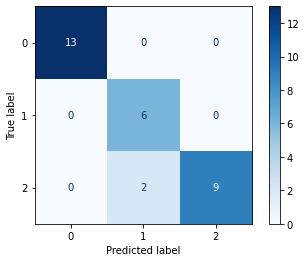

In [16]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

## Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:
- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- f1-score:-  percent of positive predictions were correct
- support:- Support is the number of actual occurrences of the class in the specified dataset.

In [17]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



## Creator: Abhishek Garg, Github: <a href="https://github.com/abhishek-252">Profile</a>